In [79]:
import pandas as pd
import unicodecsv
import matplotlib as plt

In [64]:
transactions_file = '/Users/knico/new-git-project/transaction.csv'


In [65]:
df = pd.read_csv(transactions_file)
print(df.head())
    
    

    Order Sale_Date      Type  Store_ID  Transaction_ID  SKU  Quantity  \
0  133429  2/2/2021  Delivery      1666             866  1TS     230.0   
1  132970  2/3/2021  Delivery      4736             624  R6E     372.0   
2  132685  2/4/2021  Delivery      6459             482  IEV     298.0   
3  133327  2/5/2021  Delivery      3719             810  C8Z     466.0   
4  133115  2/6/2021  Delivery      1253             708  8HU     360.0   

   Sales_Amount  Inventory  
0         37.38        156  
1          2.06        253  
2          4.96         82  
3          8.88        453  
4          2.76          8  


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133635 entries, 0 to 133634
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Order           133635 non-null  int64  
 1   Sale_Date       133635 non-null  object 
 2   Type            133635 non-null  object 
 3   Store_ID        133635 non-null  int64  
 4   Transaction_ID  133635 non-null  int64  
 5   SKU             133635 non-null  object 
 6   Quantity        133635 non-null  float64
 7   Sales_Amount    133635 non-null  float64
 8   Inventory       133635 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 9.2+ MB


In [67]:
def drop_columns(col_name):
    if col_name in df:
        df.drop(labels=col_name,axis=1 , inplace = True)
    else: 
        print(col_name ,"does not exist")
    

In [68]:
drop_columns('Order')

In [69]:
# This function will convert the data types
def change_var_type(col_as_string, ctype):
    if ctype == 'string':
        new_type = df[col_as_string].astype("|S")
    if ctype == 'number':
        new_type = df[col_as_string].astype(int)
    return new_type

In [70]:

df['Store_ID'] = change_var_type('Store_ID','string')
df['Transaction_ID']= change_var_type('Transaction_ID','string')

In [71]:
#Basic statistics on the dataframe
df.describe()


,Quantity,Sales_Amount,Inventory
count,133635.000000,133635.000000,133635.000000
mean,7.178220,11.947653,2.796805
std,49.274735,19.306320,28.038712
min,0.010000,0.020000,0.000000
25%,1.000000,4.230000,0.000000
50%,1.000000,6.920000,0.000000
75%,1.000000,12.320000,0.000000
max,1000.000000,707.730000,947.000000


In [55]:
#Add up the Sales by Location
data = df.groupby(['Store_ID']).sum()['Sales_Amount']
print(data)

Store_ID
b'1253'    162224.19
b'1666'     65985.15
b'2065'     32484.37
b'2116'     61614.45
b'2547'     32720.51
b'3071'     66979.57
b'3624'     32470.94
b'3686'     31406.65
b'3719'     32253.04
b'3874'     63209.39
b'4736'     99475.75
b'4776'     33977.25
b'4921'     31312.84
b'5010'     34017.36
b'5058'     31949.58
b'5541'     63695.54
b'5599'     65516.98
b'5780'     32727.94
b'592'      65745.46
b'6044'     65677.75
b'6294'     98304.06
b'6450'     32469.71
b'6459'     65061.79
b'6865'     31828.48
b'7548'     65768.94
b'822'      34053.33
b'8303'     33195.44
b'8566'     31618.03
b'9200'     34124.90
b'9223'     64755.21
Name: Sales_Amount, dtype: float64


In [76]:
# View the sales and deliveries by date
date_volume = df.groupby(['Sale_Date','Type']).sum()['Quantity']
print(date_volume)


Sale_Date  Type    
1/1/2021   Delivery    2358.00
           Sale         580.00
1/10/2021  Delivery    2938.00
           Sale         533.25
1/11/2021  Delivery    1308.00
                        ...   
9/7/2021   Sale         509.20
9/8/2021   Delivery    3858.00
           Sale         573.33
9/9/2021   Delivery    1803.00
           Sale         543.33
Name: Quantity, Length: 728, dtype: float64


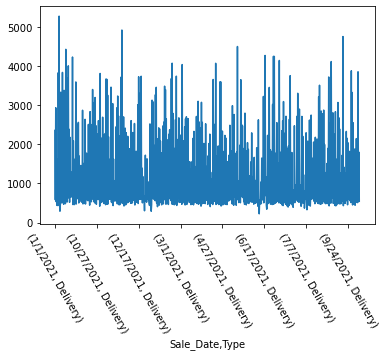

In [84]:
date_volume.plot()
plt.pyplot.xticks(rotation=300)
plt.pyplot.show()
